# DATA MANIPULATION

In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import timedelta
import numpy as np
import datetime

In [2]:
#Read the csv data
data = pd.read_csv('greentaxi.csv', low_memory  = False)

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447770 entries, 0 to 447769
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               331719 non-null  float64
 1   lpep_pickup_datetime   447770 non-null  object 
 2   lpep_dropoff_datetime  447770 non-null  object 
 3   store_and_fwd_flag     331719 non-null  object 
 4   RatecodeID             331719 non-null  float64
 5   PULocationID           447770 non-null  int64  
 6   DOLocationID           447770 non-null  int64  
 7   passenger_count        331719 non-null  float64
 8   trip_distance          447770 non-null  float64
 9   fare_amount            447770 non-null  float64
 10  extra                  447770 non-null  float64
 11  mta_tax                447770 non-null  float64
 12  tip_amount             447770 non-null  float64
 13  tolls_amount           447770 non-null  float64
 14  ehail_fee              0 non-null   

In [4]:
#as ehail_fee column is empty we drop the column
data.drop('ehail_fee', axis =1, inplace = True)

In [5]:
#there are many columns with the missing values, drop them altogether
data = data.dropna()

In [6]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000
mean,1.830320,1.101366,103.411624,130.209135,1.304114,2.592631,11.998570,0.409961,0.484573,1.212971,0.144639,0.295555,14.974024,1.452836,1.023032,0.472379
std,0.375352,0.642363,69.025152,76.783930,0.953393,3.103552,10.037637,0.597952,0.095297,2.622414,1.018295,0.043212,11.658090,0.518704,0.150004,1.037283
min,1.000000,1.000000,1.000000,1.000000,0.000000,-3.050000,-210.000000,-4.500000,-0.500000,-2.800000,-6.120000,-0.300000,-210.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,49.000000,65.000000,1.000000,0.930000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,129.000000,1.000000,1.620000,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,11.620000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,146.000000,195.000000,1.000000,3.030000,14.000000,0.500000,0.500000,2.000000,0.000000,0.300000,17.800000,2.000000,1.000000,0.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,130.680000,753.000000,4.500000,3.550000,450.000000,96.120000,0.300000,753.800000,5.000000,2.000000,2.750000


## some entries are mistakenly negative so to convert them into positive we take absolute values of such entries

In [7]:
data.loc[:,'trip_distance':'congestion_surcharge'] = data.loc[:,'trip_distance':'congestion_surcharge'].abs() 

In [8]:
#convert the data time from object to datetime
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

In [9]:
#change the data types to make further computations efficient
data = data.astype({'PULocationID': 'category',
    'DOLocationID':'category',
    'RatecodeID':'category',
    'payment_type':'category',
    'payment_type':'category',
                   'store_and_fwd_flag':'category',
                   'trip_type':'category'})

In [10]:
data.describe()

,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000,331718.000000
mean,1.830320,1.304114,2.592696,12.037011,0.412249,0.487525,1.213038,0.144675,0.297400,15.019736,0.472462
std,0.375352,0.953393,3.103498,9.991507,0.596377,0.078820,2.622383,1.018290,0.027808,11.599138,1.037246
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.930000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,0.000000
50%,2.000000,1.000000,1.620000,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,11.620000,0.000000
75%,2.000000,1.000000,3.030000,14.000000,0.500000,0.500000,2.000000,0.000000,0.300000,17.800000,0.000000
max,2.000000,9.000000,130.680000,753.000000,4.500000,3.550000,450.000000,96.120000,0.300000,753.800000,2.750000


## after detection of outliers let's remove them. To remove the outliers we remove the data which is greater than 99 percentile

In [11]:
data = data[data['total_amount'] < data['total_amount'].quantile(0.99)] 

In [12]:
data = data[data['tolls_amount'] < data['tolls_amount'].quantile(0.99)]

In [13]:
data = data[data['trip_distance'] < data['trip_distance'].quantile(0.99)]

In [14]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,0.3,4.81,1.0,1.0,0.00
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,0.3,24.36,1.0,2.0,0.00
2,2.0,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,0.3,15.34,1.0,1.0,0.00
3,1.0,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,0.3,25.05,2.0,1.0,2.75
4,1.0,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,0.3,11.30,1.0,1.0,0.00


## take only those data where pickup time is less than the dropoff time

In [15]:
data = data[data['lpep_pickup_datetime']<data['lpep_dropoff_datetime']]

In [16]:
#Find the complete time taken during the trip in minutes
data['trip_time'] = ((data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds())/60

In [17]:
# Compute for the average speed
data['speed'] = (data['trip_distance']) *60 /data['trip_time']

In [18]:
data['speed'].describe()

count    319646.000000
mean         12.943745
std         105.524719
min           0.000000
25%           8.294931
50%          10.540541
75%          13.427419
max       24840.000000
Name: speed, dtype: float64

In [19]:
#taking only such entries where trip time is greater than zero
data = data[data['trip_time'] != 0]

## We use the Z score to describe our data points by finding the relationship with their standard deviation and mean of the group of points. We take the threshold of 3 to find the outliers and remove them

In [20]:
x = scipy.stats.zscore(data.trip_time)
array = np.abs(x)
filtered_entry = (array<3)
data = data[filtered_entry == True]

In [21]:
data.describe()

,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,speed
count,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000,318191.000000
mean,1.829241,1.303110,2.217098,10.868783,0.415275,0.488743,1.129980,0.004956,0.297629,13.630651,0.472144,11.938823,13.002244
std,0.376299,0.952729,1.986331,6.783847,0.594380,0.074859,1.665865,0.119988,0.026566,7.919011,1.036974,9.043702,105.762158
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000
25%,2.000000,1.000000,0.910000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,0.000000,6.033333,8.326531
50%,2.000000,1.000000,1.580000,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,11.300000,0.000000,9.800000,10.561983
75%,2.000000,1.000000,2.840000,13.500000,0.500000,0.500000,2.000000,0.000000,0.300000,16.800000,0.000000,15.400000,13.446215
max,2.000000,9.000000,11.400000,60.000000,4.500000,3.550000,50.000000,6.000000,0.300000,60.060000,2.750000,274.500000,24840.000000


In [22]:
data['speed'] = (data['trip_distance']) *60 /data['trip_time']

In [23]:
data['speed'].describe()

count    318191.000000
mean         13.002244
std         105.762158
min           0.000000
25%           8.326531
50%          10.561983
75%          13.446215
max       24840.000000
Name: speed, dtype: float64

In [24]:
# removind the data where trip distance is zero
data = data[data['trip_distance'] != 0]

In [25]:
# removing such data where total amount is zero
data = data[data['total_amount'] != 0]

In [26]:
data['speed'].describe()

count    303497.000000
mean         13.497182
std         105.322401
min           0.011118
25%           8.646526
50%          10.760870
75%          13.634551
max       24840.000000
Name: speed, dtype: float64

# DATA EXPLORATION AND VISUALIZATION

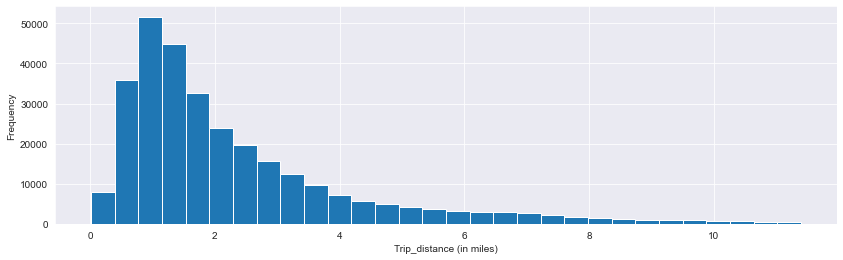

In [27]:
sns.set_style('darkgrid')
ax1 = data['trip_distance'].hist(bins = 30, figsize = (14,4))
ax1.set_xlabel('Trip_distance (in miles)')
ax1.set_ylabel('Frequency')
plt.show()

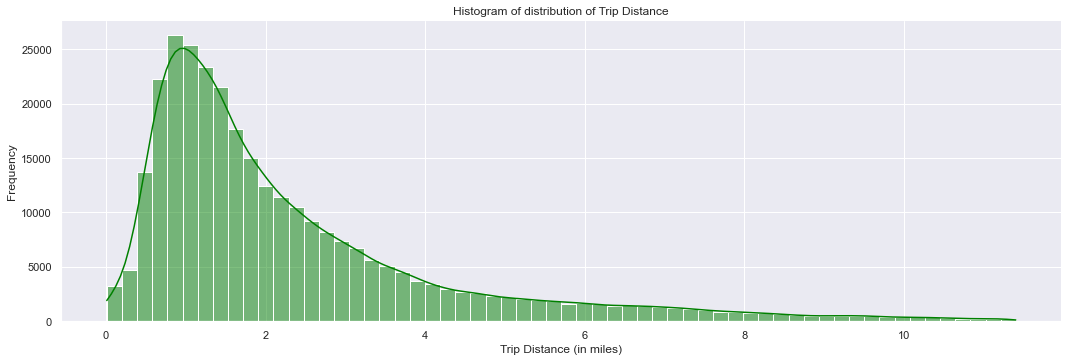

In [91]:
sns.set()
ax4=sns.displot(data['trip_distance'], kind = 'hist',bins = 60,kde= True,
              color = 'green',height=5, aspect=3)
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Frequency')             
plt.title('Histogram of distribution of Trip Distance')
plt.show()

Most of the trips are usually small between 1 to 2 miles

## we take the log transform to transform the skewed data in the above graph to approximately conform to normality

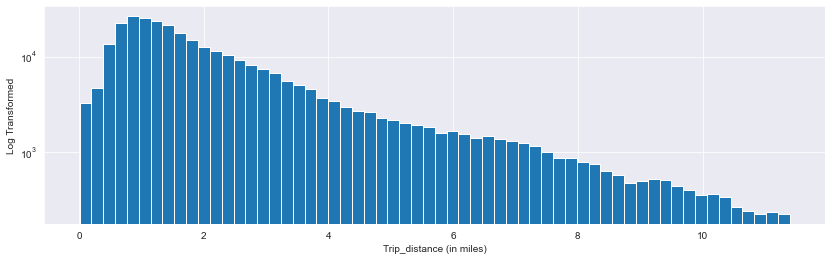

In [28]:
sns.set_style('darkgrid')
ax1 = data['trip_distance'].hist(bins = 60, figsize = (14,4))
ax1.set_yscale('log')
ax1.set_xlabel('Trip_distance (in miles)')
ax1.set_ylabel('Log Transformed')
plt.show()

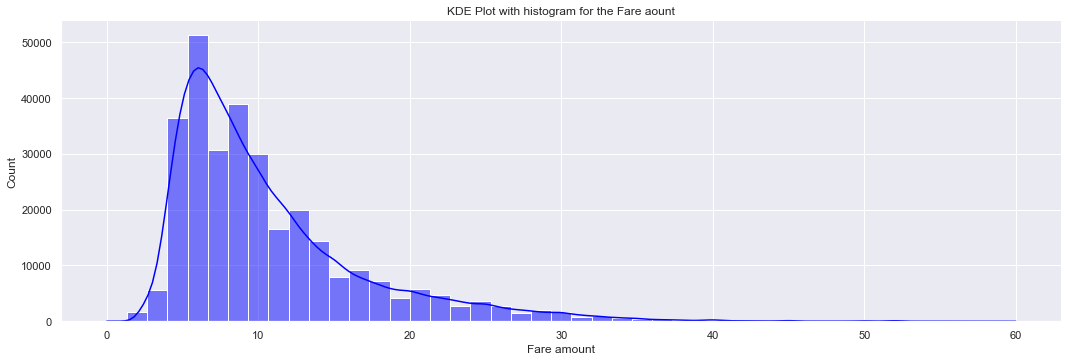

In [104]:
sns.displot(x= 'fare_amount', data = data, bins = 45, kde = True, color = 'blue',
           height = 5, aspect = 3 )
plt.xlabel('Fare amount')
plt.ylabel('Count')
plt.title('KDE Plot with histogram for the Fare aount')
plt.show()

Fare amount for most of the trips varied between 3 to 15 dollars

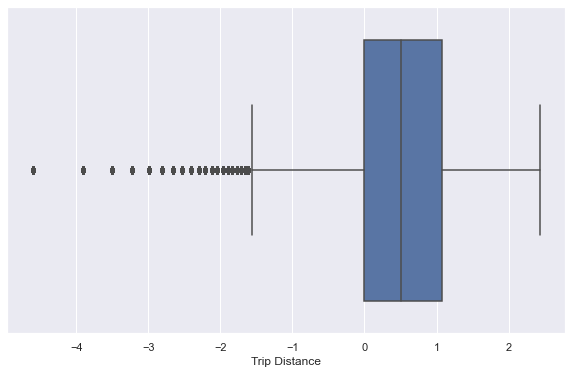

In [102]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
sns.set(rc={'figure.figsize':(10,6)})
ax3 = sns.boxplot(x = np.log(data['trip_distance']), data = data)
plt.xlabel('Trip Distance')
plt.show()

In [32]:
data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour

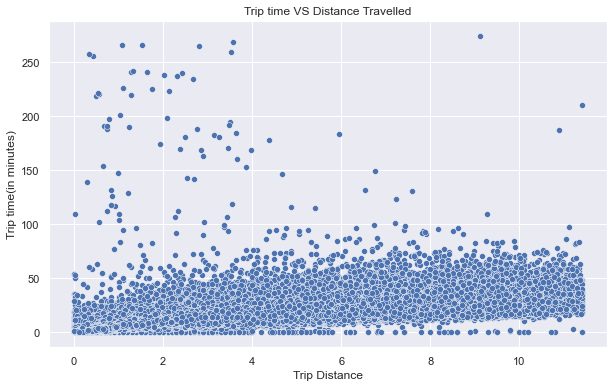

In [93]:
sns.set_style('darkgrid')
sns.scatterplot(x = 'trip_distance', y= 'trip_time', data = data)
plt.xlabel('Trip Distance')
plt.ylabel('Trip tsime(in minutes)')
plt.title('Trip time VS Distance Travelled')
plt.show()

There is no definite relation between trip time and the distance

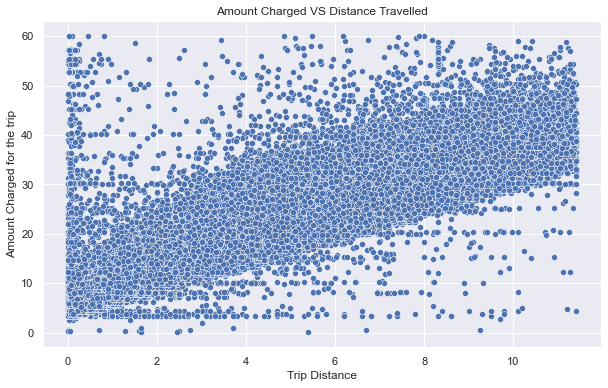

In [106]:
sns.set_style('darkgrid')
sns.scatterplot(x = 'trip_distance', y= 'total_amount', data = data)
plt.xlabel('Trip Distance')
plt.ylabel('Amount Charged for the trip')
plt.title('Amount Charged VS Distance Travelled')
plt.show()

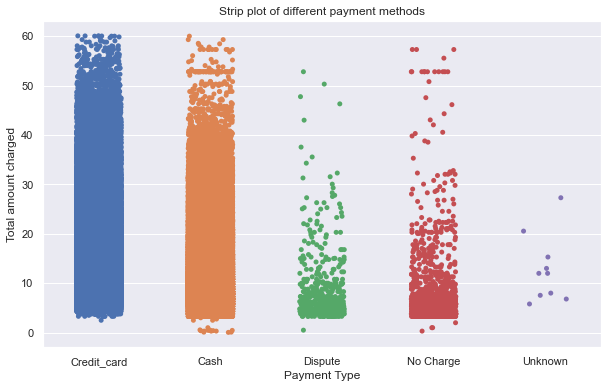

In [94]:
data['payment_type'] = data['payment_type'].replace({1:'Credit_card',2:'Cash',3:'No Charge',4:'Dispute',5:'Unknown'})
sns.stripplot(x = 'payment_type', y ='total_amount', data = data, jitter=0.2)
plt.xlabel('Payment Type')
plt.ylabel('Total amount charged')
plt.title('Strip plot of different payment methods')
plt.show()

Payments were usually made through Credit card or cash but most of the payments greater tha $40 were made through Credit Card

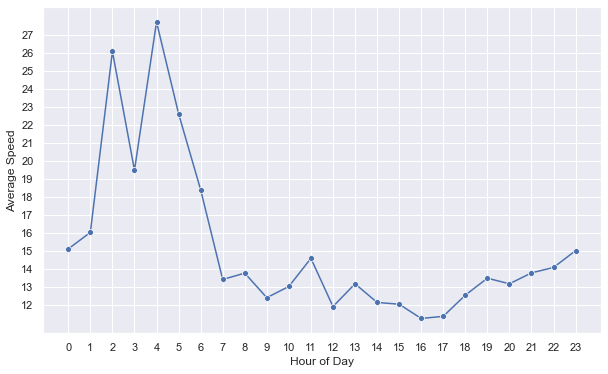

In [95]:
sns.set_style('darkgrid')
sns.lineplot(x='pickup_hour',  y='speed', data = data, marker = 'o', ci = None)
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed')
plt.xticks(np.arange(0,24,step=1))
plt.yticks(np.arange(12,28,step=1))
plt.show()

We can see average speed declines during the day time mostly because of the traffic and is maximum at night.

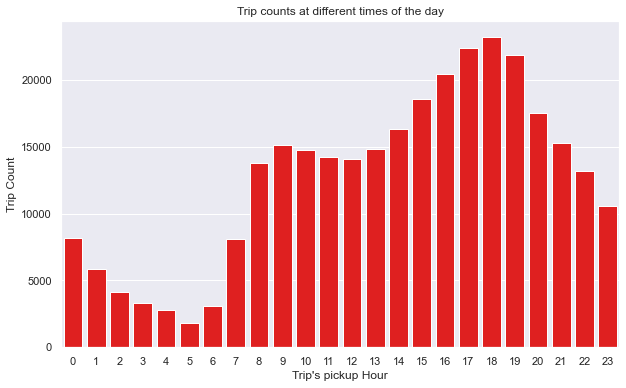

In [101]:
sns.set_style()
sns.countplot(x='pickup_hour', data=data , color = 'red')
plt.xlabel("Trip's pickup Hour")
plt.ylabel('Trip Count')
plt.title('Trip counts at different times of the day')
plt.show()

Most pickups are made between 5pm to 8pm

# Data Modeling

### 1.Linear Regression

In [115]:
predictor_variable = data[['trip_distance','trip_time','total_amount','payment_type']]

In [ ]:
target_variable = data['tip_amount']

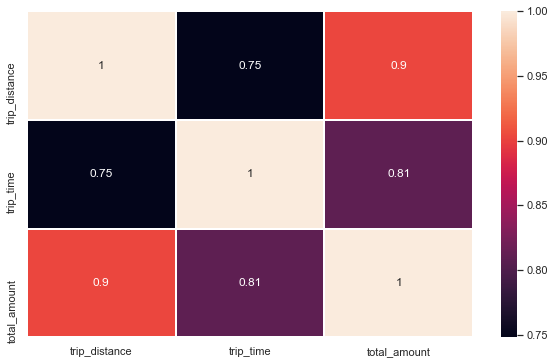

In [120]:
sns.heatmap(predictor_variable.corr(),annot=True,lw=1)
plt.show()

In [122]:
X = pd.get_dummies(data=predictor_variable, drop_first=True)
X.head()

,trip_distance,trip_time,total_amount,payment_type_Credit_card,payment_type_Dispute,payment_type_No Charge,payment_type_Unknown
1,1.28,10.683333,24.36,1,0,0,0
2,2.47,11.183333,15.34,1,0,0,0
3,6.30,21.583333,25.05,0,0,0,0
4,2.30,10.983333,11.30,1,0,0,0
5,3.00,17.350000,14.80,1,0,0,0


In [123]:
Y = data['tip_amount']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state = 100)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227622, 7)
(75875, 7)
(227622,)
(75875,)


In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [131]:
# print the intercept
print(model.intercept_)

-1.3127941477206584


In [132]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
trip_distance,-0.384379
trip_time,-0.062718
total_amount,0.248406
payment_type_Credit_card,1.422870
payment_type_Dispute,0.065099
payment_type_No Charge,0.079689
payment_type_Unknown,0.237073


A negative sign indicates that as the predictor variable increases, the Target variable decreases.

In [133]:
predictions = model.predict(X_test)
predictions

array([ 1.50547127,  1.33058657, -0.11641458, ..., -0.49537221,
        0.07659794,  3.90030163])

In [136]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 6.711e+04
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        11:35:48   Log-Likelihood:            -3.1177e+05
No. Observations:              227622   AIC:                         6.236e+05
Df Residuals:                  227614   BIC:                         6.236e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [146]:
print('Mean Absolute Error:', mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', mean_squared_error(y_test,predictions)) 

Mean Absolute Error: 0.5700163023157886
Mean Squared Error: 0.9116258505225548


### 2. Random Forest Regression

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [144]:
regressor=RandomForestRegressor(n_estimators=200,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [152]:
print('Mean Absolute Error:', mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', mean_squared_error(y_test,predictions)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R2 :',r2_score(y_test, predictions))

Mean Absolute Error: 0.5700163023157886
Mean Squared Error: 0.9116258505225548
Root Mean Squared Error: 0.9547909983460018
R2 : 0.668758077901501


### 3. Gradient Boosting Regressor

In [157]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100, random_state = 43)
gbr.fit(X_train,y_train)
predictions=gbr.predict(X_test)

In [158]:
print('Mean Absolute Error:', mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', mean_squared_error(y_test,predictions)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R2 :',r2_score(y_test, predictions))

Mean Absolute Error: 0.3672039540960981
Mean Squared Error: 0.5540184351863985
Root Mean Squared Error: 0.7443241465829242
R2 : 0.7986957793661151
